#**Batch Normalization**
If one feed input to model which having different ranges it is very hard for the network to learn the optimum weight values that minimize the loss/cost or error and cause nework to unstable . At the end vanishing and exploding gradient problem can occurr.
To overcome this we can normalize our input and also use correct weight intialization techniques and activation functions.
Even tho unstable gradient problem can occur later in the tranning.

Insted of only normalizing the input and feeding to network we normalize all the output of all the layer of our network.
(Normalizing+ Scaling+ Offseting)

Advantages:


1. Epochs take longer due to the amount of computations but convergence will be faster.
2. Achieves same accuracy faster.
3. Can lead to better performance.
4. No need to have a sytandardization layer.
5. Reduces the need for other regularization.






In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

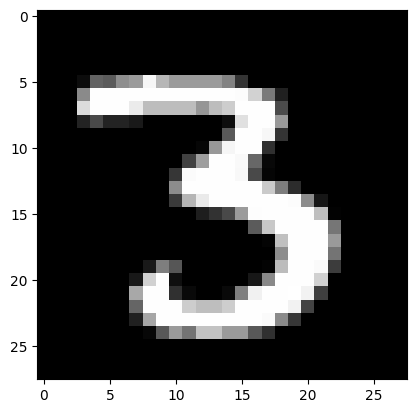

In [5]:
plt.imshow(x_train[12],cmap=plt.get_cmap('gray'))

In [6]:
x_valid,x_train= x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train= y_train[:5000]/255,y_train[5000:]/255
x_test=x_test/255

In [7]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

If you are doing batch normalization before dense layer you do not have to normalize input before.
Better to add batch normalization before activation layer.
No need to add bias already offseting is done with batch normalization.

In [8]:
from keras.utils import plot_model

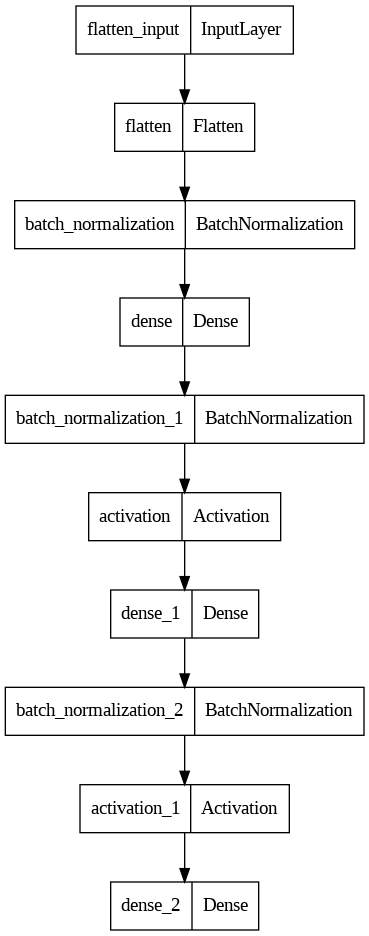

In [9]:
plot_model(model)

In [11]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 15s 8ms/step - loss: 1.7257e-06 - accuracy: 0.0990 - val_loss: 3.8648e-08 - val_accuracy: 0.0958
Epoch 2/50
1719/1719 [==============================] - 13s 8ms/step - loss: 5.1152e-09 - accuracy: 0.0990 - val_loss: 8.5831e-09 - val_accuracy: 0.0958
Epoch 3/50
1719/1719 [==============================] - 14s 8ms/step - loss: 2.8393e-10 - accuracy: 0.0990 - val_loss: 3.5524e-09 - val_accuracy: 0.0958
Epoch 4/50
1719/1719 [==============================] - 13s 8ms/step - loss: 1.9507e-11 - accuracy: 0.0990 - val_loss: 2.0027e-09 - val_accuracy: 0.0958
Epoch 5/50
1719/1719 [==============================] - 14s 8ms/step - loss: 2.1674e-12 - accuracy: 0.0990 - val_loss: 1.4067e-09 - val_accuracy: 0.0958
Epoch 6/50
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 7.8678e-10 - val_accuracy: 0.0958
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.000

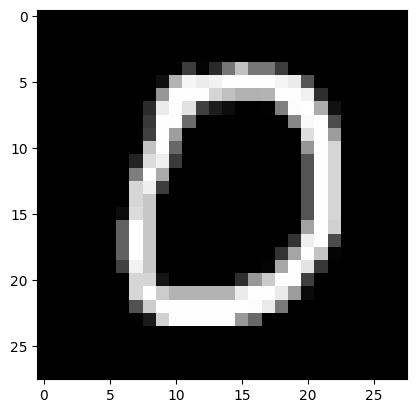

In [38]:
unseen_image = x_test[10]
plt.imshow(unseen_image,cmap=plt.get_cmap('gray'))

In [39]:
import numpy as np
unseen_images = np.expand_dims(unseen_image, axis=0)

# Normalize the pixel values if needed (similar to what you did for training data)
unseen_images = unseen_images / 255.0

# Make predictions
predictions = model.predict(unseen_images)

# Print or analyze the predictions
print("Predictions:", predictions)

# If you want to get the predicted class (index with the highest probability)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 31ms/step
Predictions: [[1.00000000e+00 1.62491669e-11 1.28788378e-11 1.59443344e-11
  1.22098694e-11 2.77675313e-11 2.53425891e-11 1.49930363e-11
  1.27346475e-11 2.70006743e-11]]
Predicted Class: [0]
